### ENSF 544 Project 2

##### Yazan Chama 30060793


#### Imports

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


#### Exploring the 2019 World Happiness Dataset 

In [37]:
data = pd.read_csv("world_happiness_data_2019.csv")
print(f"The dataset has {data.shape[0]} samples and {data.shape[1]} columns")
data.head(156)

The dataset has 156 samples and 9 columns


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [38]:
print(f"The Country with highest score was {data.iloc[0]['Country or region']}, which had a score of {data.iloc[0]['Score']}")
print(f"The Country with lowest score was {data.iloc[-1]['Country or region']}, which had a score of {data.iloc[-1]['Score']}")


The Country with highest score was Finland, which had a score of 7.769
The Country with lowest score was South Sudan, which had a score of 2.853


In [39]:
data.describe()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [40]:
print(f"The average score was {data.describe()['Score']['mean']}")

The average score was 5.407096153846155


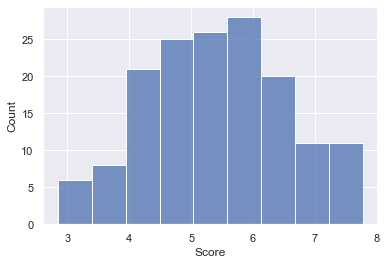

In [41]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(data=data, x="Score")
plt.show()

#### Data Pre-processing

In [134]:
# Removing the `Overall Rank` column
data.drop(['Overall rank'], axis=1, inplace=True)

# Removing the `Country or region` column
data.drop(['Country or region'], axis=1, inplace=True)


# Checking for NaN values. It appears that there are no null values
print(data.isnull().any())



KeyError: "['Overall rank'] not found in axis"

In [135]:
data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<AxesSubplot: >

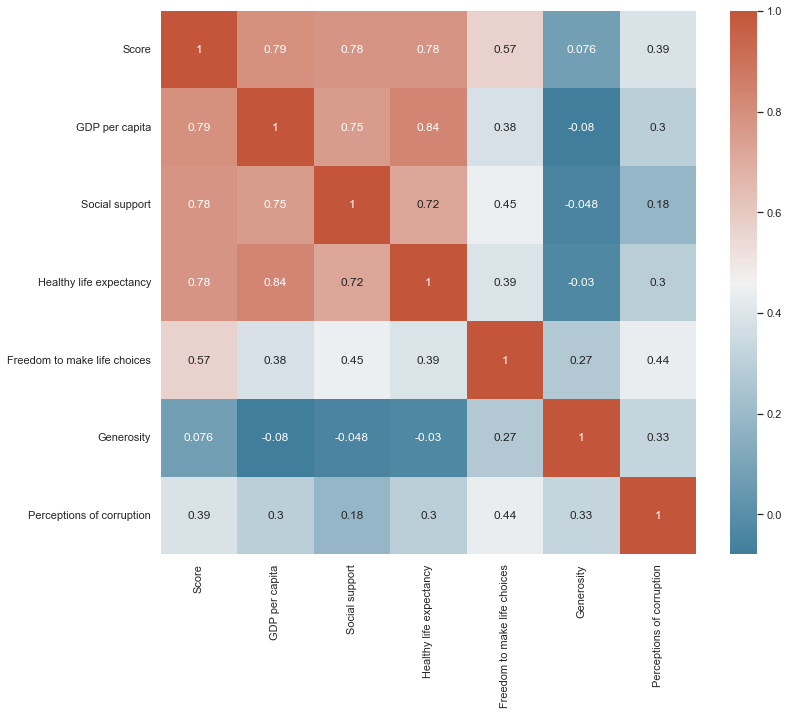

In [44]:
#
# Correlation between different variables
#
corr = data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))

# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, cmap=cmap)

In [49]:
features = data.drop('Score', axis=1)
target = data['Score']

print(f"The shape of the features are {features.shape} and the shape of the target is {target.shape}")



The shape of the features are (156, 6) and the shape of the target is (156,)


In [50]:
# Splitting the data into training and test data

seed = 100
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

In [55]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = seed).fit(X_train, y_train)

score = rf.score(X_train, y_train)
print("R-squared:", score) 

prediction = rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 






R-squared: 0.9322521737625453
MSE:  0.3080729237760941
RMSE:  0.15403646188804704


#### Improving the ML model

##### Finding the optimal depth

In [114]:
rf_max_depth_scores = {}



for maximum_depth in range(1, 15):

    if maximum_depth % 2 != 0:
        rf = RandomForestRegressor(n_estimators = 100, max_features = 1.0, max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

        score = rf.score(X_train, y_train) 

        prediction = rf.predict(X_test)

        mse = mean_squared_error(y_test, prediction)

        rf_max_depth_scores[maximum_depth] = (score, mse)


print (rf_max_depth_scores)

maximum_depth = 11





{1: (0.686168590663851, 0.5562048183979751), 3: (0.8813759058392654, 0.3577032388262253), 5: (0.9438816876273597, 0.321472521917038), 7: (0.9652720158708651, 0.32336203084956067), 9: (0.9694469741112504, 0.3356907520655875), 11: (0.969985753360059, 0.332134923878155), 13: (0.9697974178719562, 0.33337789983853794)}


In [130]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 1.0, max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

score = rf.score(X_train, y_train) 

prediction = rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)

print("When the maximum_depth=11\n")

print("R-squared:", score)
print("MSE: ", mse)

When the maximum_depth=11

R-squared: 0.9697974178719562
MSE:  0.33337789983853794


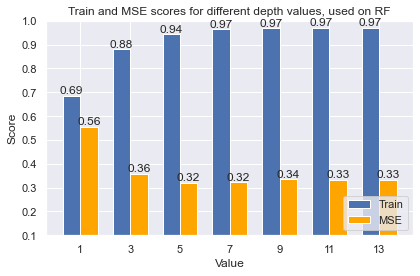

In [115]:

def plotKScores(df, title, yrange):
    fig, ax = plt.subplots()
    index = np.arange(len(df.columns))
    bar_width = 0.35

    plt.ylim(yrange)
    train_bar = plt.bar(index, df.iloc[0], bar_width, color='b', label='Train')
    test_bar = plt.bar(index + bar_width, df.iloc[1], bar_width, color='orange', label='MSE')


    plt.xlabel('Value')
    plt.ylabel('Score')
    plt.title(title)
    plt.xticks(index + bar_width/2, df.columns)
    plt.legend(loc="lower right")

    # From https://stackoverflow.com/questions/40489821/how-to-write-text-above-the-bars-on-a-bar-plot-python
    for rect in train_bar + test_bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plotKScores(pd.DataFrame(rf_max_depth_scores), 'Train and MSE scores for different depth values, used on RF', (0.1, 1.0))


In [126]:
rf_estimators_scores = {}


for number_of_estimators in range(200, 225):

    if number_of_estimators % 2 != 0:
        rf = RandomForestRegressor(n_estimators = number_of_estimators, max_features = 1.0, max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

        score = rf.score(X_train, y_train) 

        prediction = rf.predict(X_test)

        mse = mean_squared_error(y_test, prediction)

        rf_estimators_scores[number_of_estimators] = (score, mse)

print (rf_estimators_scores)

number_of_estimators = 219


{201: (0.9713091678523841, 0.3259563637124802), 203: (0.9711642492528668, 0.3259430231171039), 205: (0.9712682561138674, 0.32542945346246743), 207: (0.9712032990214647, 0.32565664390924043), 209: (0.9711472825900628, 0.32490587018880845), 211: (0.9710455297116733, 0.32484135268172176), 213: (0.9711149372716342, 0.32449040689941855), 215: (0.9711566604885639, 0.3254281676995562), 217: (0.9711489494177226, 0.32569099020476455), 219: (0.9712578677342334, 0.3245157973657618), 221: (0.9714295038390873, 0.3259704562721033), 223: (0.9714874735923511, 0.3276439515122338)}


In [131]:
rf = RandomForestRegressor(n_estimators = number_of_estimators, max_features = 1.0, max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

score = rf.score(X_train, y_train) 

prediction = rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)

print("When the number_of_estimators=219 and the maximum depth=11\n")

print("R-squared:", score)
print("MSE: ", mse)

When the number_of_estimators=219 and the maximum depth=11

R-squared: 0.9712578677342334
MSE:  0.3245157973657618


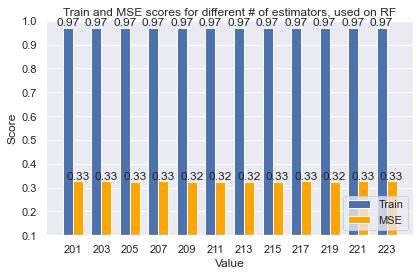

In [127]:
plotKScores(pd.DataFrame(rf_estimators_scores), 'Train and MSE scores for different # of estimators, used on RF', (0.1, 1.0))


In [132]:
rf = RandomForestRegressor(n_estimators = number_of_estimators, max_features = 'sqrt', max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

score = rf.score(X_train, y_train) 

prediction = rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)

rf_estimators_scores[number_of_estimators] = (score, mse)

print("When the max_features=sqrt, number_of_estimators=219 and the maximum depth=11\n")

print("R-squared:", score)
print("MSE: ", mse)



When the max_features=sqrt, number_of_estimators=219 and the maximum depth=11

R-squared: 0.9731135781429991
MSE:  0.2997175013987408


In [133]:
rf = RandomForestRegressor(n_estimators = number_of_estimators, max_features = 'log2', max_depth = maximum_depth, random_state = seed).fit(X_train, y_train)

score = rf.score(X_train, y_train) 

prediction = rf.predict(X_test)

mse = mean_squared_error(y_test, prediction)

rf_estimators_scores[number_of_estimators] = (score, mse)

print("When the max_features=log2,number_of_estimators=219 and the maximum depth=11\n")
print("R-squared:", score)
print("MSE: ", mse)

When the max_features=log2,number_of_estimators=219 and the maximum depth=11

R-squared: 0.9731135781429991
MSE:  0.2997175013987408
